# Results

1. Year log comparison of SDR and HDR (use a defiened sample rate) (show yearly treds)
2. Comparison of the systems componets contribution to the end-to-end system
    - HDR
    - SDR
3. Peak hour in each months to show comparion of monthly variation of HDR vs SDR
4. Weekly variastion in HDR and SDR
5. Anlysis of increased audience (requires 3 runs of the model with different mean growths)
6. Analysis of Stoarge intensity (SDD and HDD) for both SDR and HDR
7. Energy vs Carbon footprint





In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime 
import matplotlib.dates as mdates

In [98]:
sheet_1 = "mean energy"
sheet_2 = "mean carbon"


test_file = "./output/long_term_carbon_model/aud_mg_008_str_hdd_1457/summary_0506-1433.xlsx"

test_energy_df = pd.read_excel(test_file, sheet_name = sheet_1)
test_carbon_df = pd.read_excel(test_file, sheet_name = sheet_2)

test_carbon_df

,Scenario,group,Origin Datacentre,Content Delivery Network,Core Network,Access Network,TV
0,default,d_000_h_00,0.620002,2.690586,3.247215,3.461351,3303.760763
1,NaN,d_000_h_01,0.299335,1.298707,1.571968,1.669404,1595.972870
2,NaN,d_000_h_02,0.179088,0.777223,0.943284,1.000377,956.575055
3,NaN,d_000_h_03,0.120310,0.522258,0.633181,0.670741,641.795937
4,NaN,d_000_h_04,0.098505,0.427487,0.518396,0.550358,526.759764
...,...,...,...,...,...,...,...
17515,NaN,d_364_h_19,7.292523,32.132793,36.921831,40.044757,30565.216008
17516,NaN,d_364_h_20,5.956213,26.231854,30.105212,32.689564,24941.106370
17517,NaN,d_364_h_21,5.754328,25.344330,29.100608,31.545775,24078.395845
17518,NaN,d_364_h_22,5.037395,22.197322,25.494099,27.698056,21137.031084


In [99]:
#Function to extract day number
def get_day(group):
    day = group.split("_")[1]
    return int(day)

def get_hour(group):
    hour = group.split("_")[3]
    return int(hour)

def total(df):
    total = df["Origin Datacentre"] + df["Content Delivery Network"] + df["Core Network"] + df["Access Network"] + df["TV"]
    return total    

def format_dr_df(df):
    df = df.reset_index()

    df = df.drop(columns = ["Scenario","index","group"])

    df = df.rename(columns={"Origin Datacentre":"origin_datacentre","Content Delivery Network":"content_delivery_network","Core Network":"core_network","Access Network":"access_network"})
   
    df['datetime'] = df.apply(lambda row: datetime.datetime(2023, 1, 1) + datetime.timedelta(days=row['day'], hours=row['hour']), axis=1)
    df['datetime'] = pd.to_datetime(df['datetime'])
   
    df = df.set_index('datetime')
    df = df.drop(['day', 'hour'], axis=1)
   
    return df

def format_df(df):
    df["day"] = df["group"].apply(get_day)
    df["hour"] = df["group"].apply(get_hour)
    df["hour_total"] = total(df)
    
    df = df[["Scenario","group","day","hour","Origin Datacentre","Content Delivery Network","Core Network","Access Network","TV","hour_total"]]
    
    split_index = df.loc[df["Scenario"] == "HDR"].index[0]
    
    sdr_df = df[:split_index]  
    hdr_df = df[split_index:]
    
    sdr_df = format_dr_df(sdr_df)
    hdr_df = format_dr_df(hdr_df)

    return sdr_df,hdr_df

#resample function

def plot_hourly(x,y_list,x_label,y_label,title,plot_names):
    fig, ax = plt.subplots(figsize=(70,10))
    for i,y in enumerate(y_list):
        ax.plot(x, y,label = plot_names[i])
        ax.fill_between(x, 0, y, alpha=1)
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.legend()
    plt.show()
    fig.clf()

#System component plot and figures and pie chart

#comparison of viewing times

#compariosn of HDD and SDD


In [100]:
test_sdr, test_hdr = format_df(test_carbon_df)

test_hdr

,origin_datacentre,content_delivery_network,core_network,access_network,TV,hour_total
datetime,,,,,,
2023-01-01 00:00:00,1.363839,5.999352,6.868978,7.456450,5700.557980,5722.246598
2023-01-01 01:00:00,0.667775,2.940567,3.371432,3.667773,2798.530514,2809.178062
2023-01-01 02:00:00,0.394359,1.737954,1.998342,2.169064,1653.700565,1660.000283
2023-01-01 03:00:00,0.248433,1.094221,1.256054,1.365517,1039.708054,1043.672278
2023-01-01 04:00:00,0.215245,0.947189,1.085862,1.174406,898.786153,902.208854
...,...,...,...,...,...,...
2023-12-31 19:00:00,7.292523,32.132793,36.921831,40.044757,30565.216008,30681.607913
2023-12-31 20:00:00,5.956213,26.231854,30.105212,32.689564,24941.106370,25036.089214
2023-12-31 21:00:00,5.754328,25.344330,29.100608,31.545775,24078.395845,24170.140886


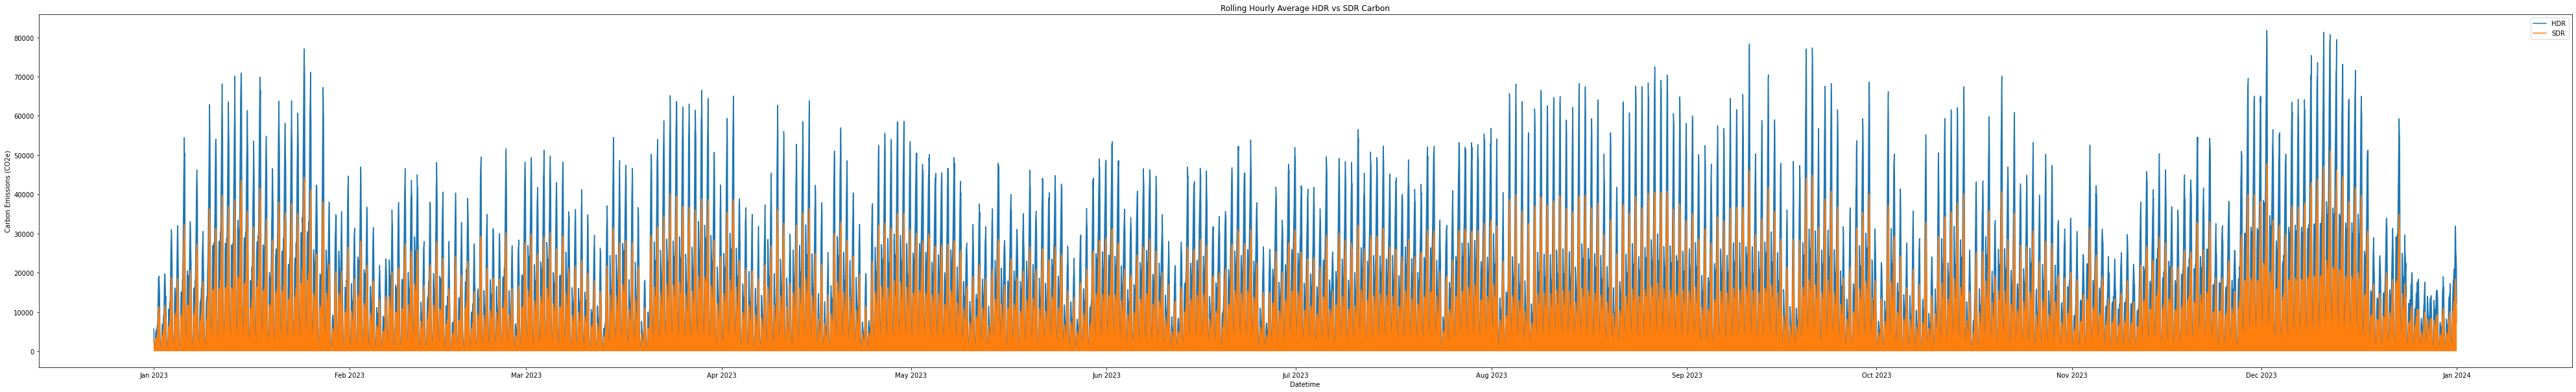

In [102]:

plot_hourly(test_sdr.index,[test_hdr["hour_total"],test_sdr["hour_total"]], "Datetime", "Carbon Emissions (CO2e)","Rolling Hourly Average HDR vs SDR Carbon",["HDR","SDR"])